In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = None

In [3]:
df=pd.read_csv('gaiadatawithnearby.csv')

In [4]:
df.drop(columns='idtable_oid', inplace=True)

In [5]:
milliarcsecs=df.parallax.values

In [6]:
arcsecs=milliarcsecs/1000

In [7]:
parsecs=1/arcsecs

In [8]:
df['distance']=parsecs

In [9]:
distancemod=-5*np.log10(parsecs)+5

In [10]:
df['g_absmag']=df['phot_g_mean_mag']+distancemod
df['bp_absmag']=df['phot_bp_mean_mag']+distancemod
df['rp_absmag']=df['phot_rp_mean_mag']+distancemod

In [11]:
df['abs_g_rp']=df['g_absmag']-df['rp_absmag']
df['abs_bp_rp']=df['bp_absmag']-df['rp_absmag']
df['abs_bp_g']=df['bp_absmag']-df['g_absmag']

In [12]:
conditions=[np.logical_not(np.isnan(df['gaiadr3_source_id'])),np.logical_not(np.isnan(df['GaiaEDR3'])),(np.logical_and(np.isnan(df['gaiadr3_source_id']), np.isnan(df['GaiaEDR3'])))]
values=["our table","nearby table","neither"]
df['source_table']=np.select(conditions,values)

In [13]:
df['source_table'].unique()

array(['nearby table', 'our table'], dtype=object)

In [14]:
df['source_table'].value_counts() #checking that both tables appear and no neither table and that numbers are right
#missing one from our table but that's okay for now

source_table
nearby table    331271
our table          194
Name: count, dtype: int64

In [15]:
#filter out shitty flux measurements
df=df[(df.phot_g_mean_flux_error/df.phot_g_mean_flux)<0.1]
df=df[(df.phot_bp_mean_flux_error/df.phot_bp_mean_flux)<0.1]
dffilt=df[(df.phot_rp_mean_flux_error/df.phot_rp_mean_flux)<0.1]

In [16]:
dffilt

,pop_id,TIC,gaiadr3_source_id,epic_id,per,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,vbroad,vbroad_error,vbroad_nb_transits,grvs_mag,grvs_mag_error,grvs_mag_nb_transits,rvs_spec_sig_to_noise,phot_variable_flag,l,b,ecl_lon,ecl_lat,in_qso_candidates,in_galaxy_candidates,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,in_andromeda_survey,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,nearbyids_oid,GaiaEDR3,distance,g_absmag,bp_absmag,rp_absmag,abs_g_rp,abs_bp_rp,abs_bp_g,source_table
0,NaN,NaN,NaN,NaN,NaN,1636148068921376768,Gaia DR3 5826158531885098752,5826158531885098752,1536164875,2016.0,239.498987,0.432839,-63.492890,0.434549,8.383488,0.673019,12.456539,8.032022,4.581393,0.375127,6.597289,0.588183,0.089811,-0.050153,-0.645617,-0.350611,0.257592,-0.421886,0.154382,-0.107544,0.338469,-0.193930,743,0,743,0,292.695700,172692.27000,5.361309,2655.763700,31,False,1.405255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86,22,0.860978,91,57,0,0.159201,33.812588,19,0,14.987204,0.652715,0.476714,0.478045,0.398423,-104.65019,70.749596,12.468445,-18.276200,False,765,4.975413e+03,1.956380e+01,254.31730,16.445293,80,2.204637e+03,4.654482e+00,473.658870,16.980200,82,5.368657e+03,5.778043e+00,929.14795,15.423231,1.522144,0.0,2.0,0.0,1.0,0.0,1.556969,0.534906,1.022062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NOT_AVAILABLE,322.049085,-7.777797,252.276133,-41.918344,False,False,0,True,False,False,False,False,False,True,False,1.022256e-13,5.106118e-13,0.999980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,217023.0,5.8261

In [17]:
df['source_table'].value_counts() #dropped two of ours and about 40k of the others

source_table
nearby table    289298
our table          192
Name: count, dtype: int64

In [18]:
ourtable=dffilt[dffilt.source_table=='our table']
nearbytable=dffilt[dffilt.source_table=='nearby table']

In [19]:
ptcolor='deeppink' #just for fun for now but can change default color easily here for all graphs

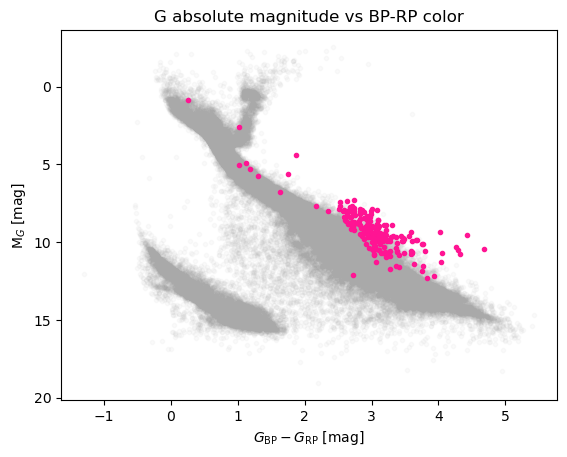

In [20]:
plt.scatter(nearbytable.abs_bp_rp,nearbytable.g_absmag,marker='.',color='darkgray',alpha=0.05)
plt.scatter(ourtable.abs_bp_rp,ourtable.g_absmag,marker='.',color=ptcolor)
plt.gca().invert_yaxis()
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G_{\text{BP}}-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs BP-RP color')
plt.show()

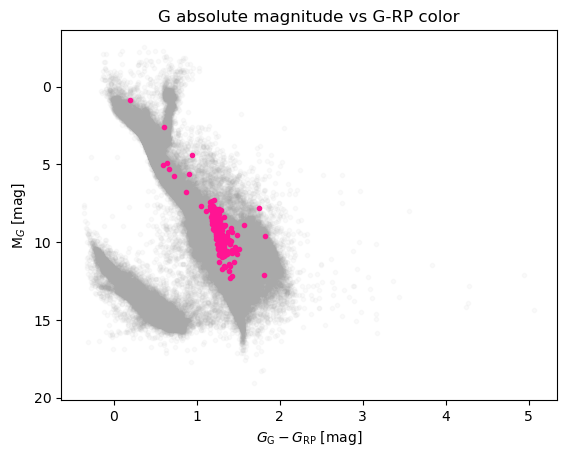

In [21]:
plt.scatter(nearbytable.abs_g_rp,nearbytable.g_absmag,marker='.',color='darkgray',alpha=0.05)
plt.scatter(ourtable.abs_g_rp,ourtable.g_absmag,marker='.',color=ptcolor)
plt.gca().invert_yaxis()
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G_{\text{G}}-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs G-RP color')
plt.show()

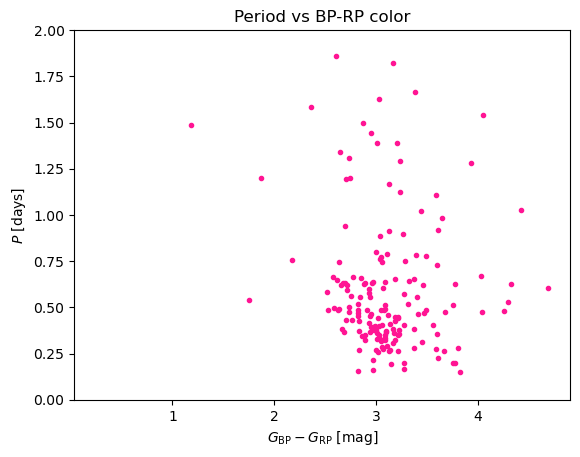

In [22]:
plt.scatter(ourtable.abs_bp_rp,ourtable.per,marker='.',color=ptcolor)
plt.ylabel(r'$P$ [days]')
plt.xlabel(r'$G_{\text{BP}}-G_{\text{RP}}$ [mag]')
plt.title('Period vs BP-RP color')
plt.ylim(0,2) #cutting out some outliers for better visibility
plt.show()

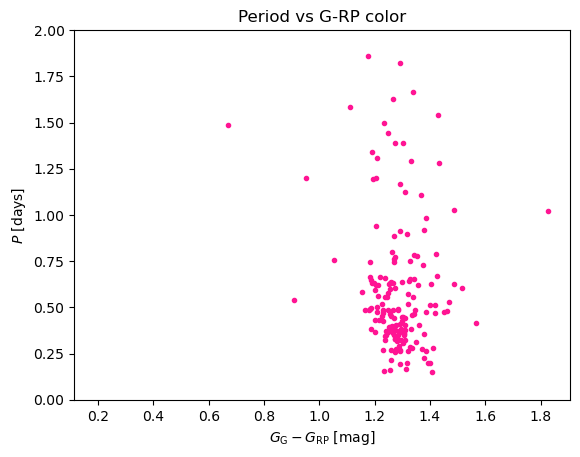

In [23]:
plt.scatter(ourtable.abs_g_rp,ourtable.per,marker='.',color=ptcolor)
plt.ylabel(r'$P$ [days]')
plt.xlabel(r'$G_{\text{G}}-G_{\text{RP}}$ [mag]')
plt.title('Period vs G-RP color')
plt.ylim(0,2) #cutting out some outliers for better visibility
plt.show()

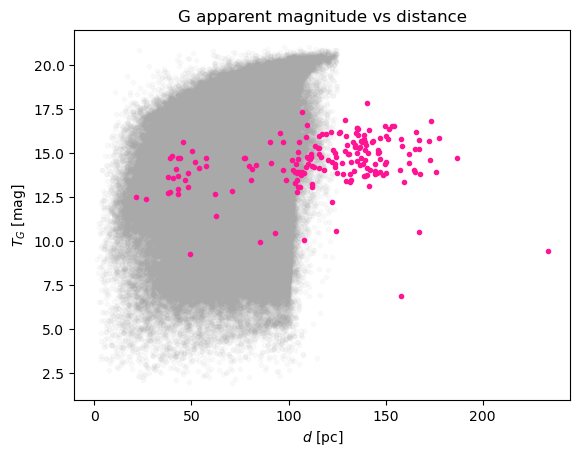

In [24]:
plt.scatter(nearbytable.distance,nearbytable.phot_g_mean_mag,marker='.',color='darkgray',alpha=0.05)
plt.scatter(ourtable.distance,ourtable.phot_g_mean_mag,marker='.',color=ptcolor)
plt.ylabel(r'$T_G$ [mag]')
plt.xlabel(r'$d$ [pc]')
plt.title('G apparent magnitude vs distance')
plt.show()

In [25]:
#adding log color scale abilities
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as colors

In [26]:
#first filter out period above 2 for our table
ourtablefilt=ourtable[ourtable['per']<=2]

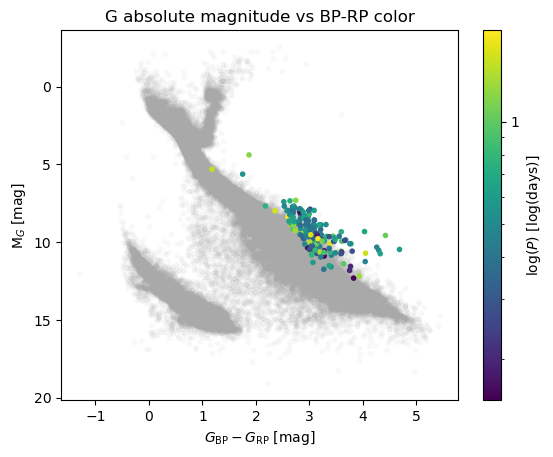

In [27]:
plt.scatter(nearbytable.abs_bp_rp,nearbytable.g_absmag,marker='.',color='darkgray',alpha=0.05)
plt.scatter(ourtablefilt.abs_bp_rp,ourtablefilt.g_absmag,c=ourtablefilt.per,norm=colors.LogNorm(),marker='.')
plt.gca().invert_yaxis()
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G_{\text{BP}}-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs BP-RP color')
cbar=plt.colorbar()
cbar.ax.set_ylabel(r'log($P$) [log(days)]')
cbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:g}')) #thank you chatgpt
plt.show()

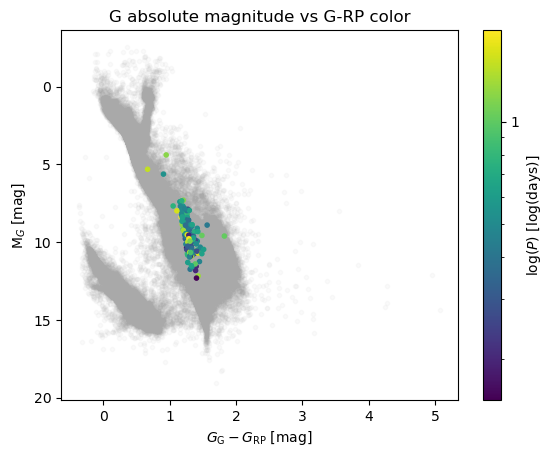

In [28]:
plt.scatter(nearbytable.abs_g_rp,nearbytable.g_absmag,marker='.',color='darkgray',alpha=0.05)
plt.scatter(ourtablefilt.abs_g_rp,ourtablefilt.g_absmag,c=ourtablefilt.per,norm=colors.LogNorm(),marker='.')
plt.gca().invert_yaxis()
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G_{\text{G}}-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs G-RP color')
cbar=plt.colorbar()
cbar.ax.set_ylabel(r'log($P$) [log(days)]')
cbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:g}')) #thank you chatgpt
plt.show()

In [29]:
#okay now repeat CMDs with RUWE color coding
conditions=[ourtable.ruwe<1.4,True]
category=['ruwe<1.4','ruwe>=1.4']
ourtable['ruwecat']=np.select(conditions,category)

/var/folders/zd/14hqhh8n6v122yj77t47nyv40000gn/T/ipykernel_30136/3622421201.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ourtable['ruwecat']=np.select(conditions,category)


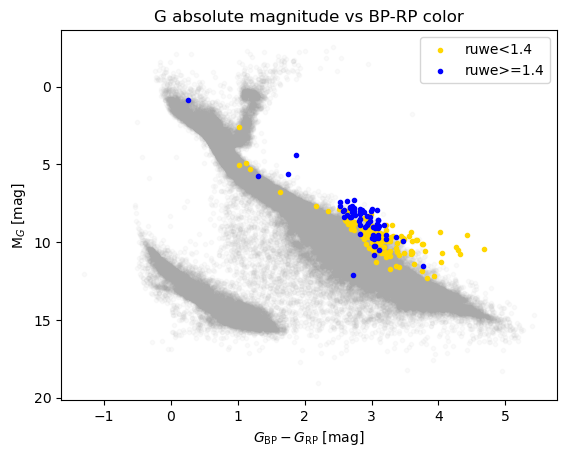

In [30]:
plt.scatter(nearbytable.abs_bp_rp,nearbytable.g_absmag,marker='.',color='darkgray',alpha=0.05)
plt.scatter(ourtable[ourtable.ruwecat=='ruwe<1.4'].abs_bp_rp,ourtable[ourtable.ruwecat=='ruwe<1.4'].g_absmag,marker='.',color='gold',label='ruwe<1.4')
plt.scatter(ourtable[ourtable.ruwecat=='ruwe>=1.4'].abs_bp_rp,ourtable[ourtable.ruwecat=='ruwe>=1.4'].g_absmag,marker='.',color='blue',label='ruwe>=1.4')
plt.gca().invert_yaxis()
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G_{\text{BP}}-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs BP-RP color')
plt.legend()
plt.show()

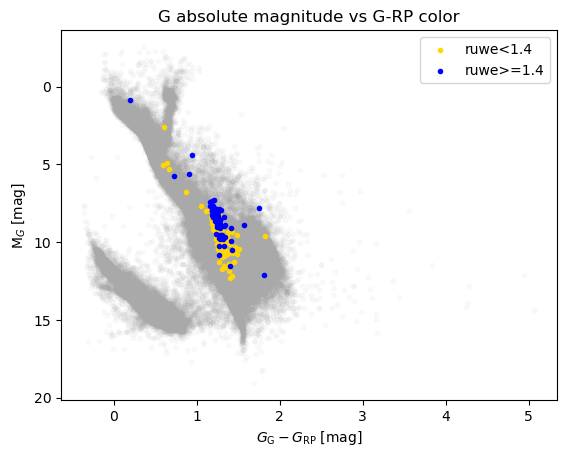

In [31]:
plt.scatter(nearbytable.abs_g_rp,nearbytable.g_absmag,marker='.',color='darkgray',alpha=0.05)
plt.scatter(ourtable[ourtable.ruwecat=='ruwe<1.4'].abs_g_rp,ourtable[ourtable.ruwecat=='ruwe<1.4'].g_absmag,marker='.',color='gold',label='ruwe<1.4')
plt.scatter(ourtable[ourtable.ruwecat=='ruwe>=1.4'].abs_g_rp,ourtable[ourtable.ruwecat=='ruwe>=1.4'].g_absmag,marker='.',color='blue',label='ruwe>=1.4')
plt.gca().invert_yaxis()
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G_{\text{G}}-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs G-RP color')
plt.legend()
plt.show()